### **Clustering**



Clustering (cluster analysis) **bold text** is grouping objects based on similarities


**What are clustering algorithms?**

Clustering algorithms are used to group data points based on certain similaritiest.

---
---

They can be grouped into

1. **Centroid models** - like K-Means clustering  
2. **Connectivity models** - like hierarchical clustering, which builds models based on distance connectivity
3. **Density models** – like DBSCAN and OPTICS, which define clustering as a connected dense region in data space.
4. **Neural models** – self-organizing maps are one of the most commonly known Unsupervised Neural networks (NN).


## **Centroid models**

## **Step-by-Step Explanation of K-Means Clustering**

#### **Step 1: Define the number of clusters (k)**

- Decide how many clusters (**k**) you want to divide the data into.
- This value is usually determined using methods like the **Elbow Method** or **Silhouette Score**.

---

#### **Step 2: Initialize centroids**

- Randomly initialize **k centroids** (points in the feature space).
- These centroids represent the "center" of each cluster. Initially, they may not correspond to meaningful clusters.

---

#### **Step 3: Assign each data point to the nearest centroid**
- For each data point, compute its distance to all centroids (e.g., using **Euclidean distance**).
- Assign the data point to the cluster of the nearest centroid.
- After this step, every data point belongs to one of the **k clusters**.

---

#### **Step 4: Update centroids**

- For each cluster, compute the mean of all points in that cluster.
- The computed mean becomes the new **centroid** for that cluster.

---

#### **Step 5: Repeat steps 3 and 4 until convergence**

- **Reassign data points** to the nearest centroid based on the updated positions.
- **Recompute the centroids** after assigning data points.
- This iterative process continues until the centroids stop changing significantly or a maximum number of iterations is reached.

---

#### **Step 6: Output the final clusters**

- The algorithm ends when centroids are stable (converged).
- At this point, each data point belongs to a specific cluster, and the centroids represent the cluster centers.

---

## **Key Characteristics of K-Means**
1. **Iterative algorithm**: Adjusts assignments and centroids until convergence.
2. **Distance-based**: Relies on measures like **Euclidean distance**.
3. **Cluster shape**: Assumes clusters are roughly spherical and of equal size.

---

#### **Limitations**

1. Requires predefining **k** (number of clusters).
2. Not effective for non-spherical clusters or datasets with varying densities.
3. Sensitive to outliers, as they can skew the centroids.

---

#### **Improving K-Means**

1. Use **K-Means++** for better centroid initialization.
2. Experiment with **distance metrics** for different data types.
3. Normalize/standardize the dataset before applying K-Means.

---


#### **Visualizing Results**
- **2D or 3D datasets**: Plot clusters and their centroids.
- **Higher dimensions**: Use **PCA** for dimensionality reduction before visualization.



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/NUELBUNDI/Machine-Learning-Data-Set/refs/heads/main/Country-data.csv'
df  = pd.read_csv(url)

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.drop(columns='country', inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler    = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame for inspection

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.sample(1)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
164,-0.372315,1.130305,0.008877,1.38003,-0.658404,0.409732,0.286958,-0.661206,-0.637754


**Apply K-Means Clustering**

In [ ]:
# Lets apply K-Means

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Get cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Add the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_
df.sample(3)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
78,21.1,48.3,8.04,69.0,9470,8.43,75.8,3.66,3680,0
45,34.4,22.7,6.22,33.3,11100,5.44,74.6,2.60,5450,0
16,18.8,58.2,5.20,57.5,7880,1.14,71.4,2.71,4340,0


**Visualize the Clusters**

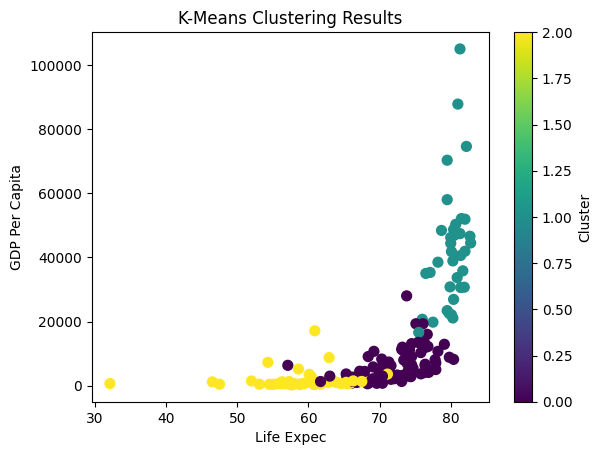

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(df['life_expec'], df['gdpp'], c=df['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering Results')
plt.xlabel('Life Expec')
plt.ylabel('GDP Per Capita')
plt.colorbar(label='Cluster')
plt.show()

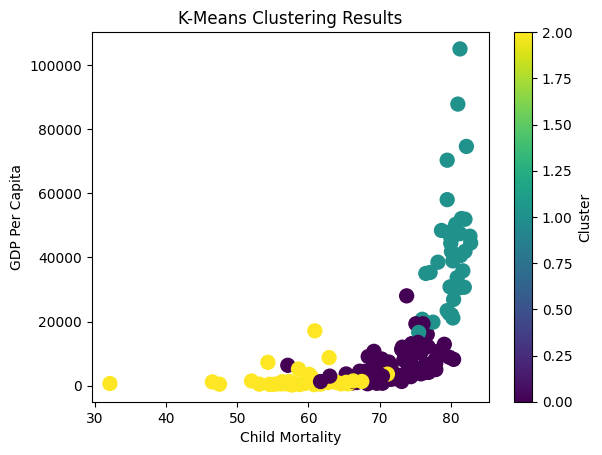

In [ ]:
# Visualize the clusters (using 'hild_mort' and 'gdpp')
plt.scatter(df['life_expec'], df['gdpp'], c=df['Cluster'], cmap='viridis', s=100)
plt.title('K-Means Clustering Results')
plt.xlabel('Child Mortality')
plt.ylabel('GDP Per Capita')
plt.colorbar(label='Cluster')
plt.show()

**Evaluate the Clustering**

In [ ]:
print(f"Inertia: {kmeans.inertia_}")


Inertia: 831.5351582151586


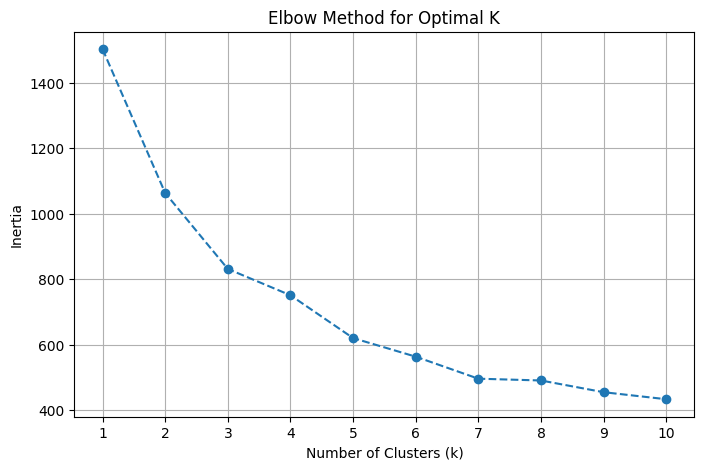

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
inertia_values = []
k_range = range(1, 11)

for k in k_range:

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

#### **Evaluation Metrics for Above is**

**1. Davies-Bouldin Index**

**Purpose:** Measures the compactness of clusters and the separation between clusters.

**Range:** The lower the index, the better the clustering.

---


**2. Calinski-Harabasz Index (Variance Ratio Criterion)**

**Purpose:** Measures the ratio of between-cluster variance to within-cluster variance.

**Range** : Higher values indicate better clustering.

---


3. **Cluster Visualization**

Use visualizations to assess cluster separability, such as:
Scatter plots (for 2D data). T-SNE or PCA (for higher-dimensional data).


4. **Silhouette Score**

Purpose: Measures how well each data point fits within its assigned cluster compared to other clusters.

Range: From -1 to 1:

- 1: Perfect clustering.
- 0: Overlapping clusters.
- Negative: Points assigned to the wrong clusters.

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_clustering(X, clustering_model):

    metrics = {}
    labels  = clustering_model.labels_ if hasattr(clustering_model, 'labels_') else clustering_model.predict(X)

    try:
        metrics['Silhouette Score']        = silhouette_score(X, labels)
        metrics['Davies-Bouldin Index']    = davies_bouldin_score(X, labels)
        metrics['Calinski-Harabasz Index'] = calinski_harabasz_score(X, labels)

    except ValueError as e:
        return {"Error": str(e)}

    return metrics


In [ ]:
evaluate_clustering(df_scaled, kmeans)
print("KMEANS Evaluation:", evaluate_clustering(df_scaled, kmeans))

KMEANS Evaluation: {'Silhouette Score': 0.19624516158796698, 'Davies-Bouldin Index': 1.1682578589993138, 'Calinski-Harabasz Index': 43.03231500665885}


**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler

# Sample data (df_scaled from earlier)

# DBSCAN Model
dbscan = DBSCAN(eps=1.0, min_samples=2)
dbscan.fit(df_scaled)

# Evaluate DBSCAN clustering
dbscan_evaluation = evaluate_clustering(df_scaled, dbscan)
print("DBSCAN Evaluation:", dbscan_evaluation)


DBSCAN Evaluation: {'Silhouette Score': -0.06803564496952415, 'Davies-Bouldin Index': 1.671265972425636, 'Calinski-Harabasz Index': 6.671747294292629}


**OPTICS**

In [ ]:
# OPTICS Model
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
optics.fit(df_scaled)

# Evaluate OPTICS clustering
optics_evaluation = evaluate_clustering(df_scaled, optics)
print("OPTICS Evaluation:", optics_evaluation)

OPTICS Evaluation: {'Silhouette Score': 0.037196891855858644, 'Davies-Bouldin Index': 1.1891183933857994, 'Calinski-Harabasz Index': 20.321499098132268}


**Connectivity Models: Hierarchical Clustering**

Hierarchical Clustering Evaluation: {'Silhouette Score': 0.24563001303300652, 'Davies-Bouldin Index': 1.299788958694555, 'Calinski-Harabasz Index': 50.71615124994364}


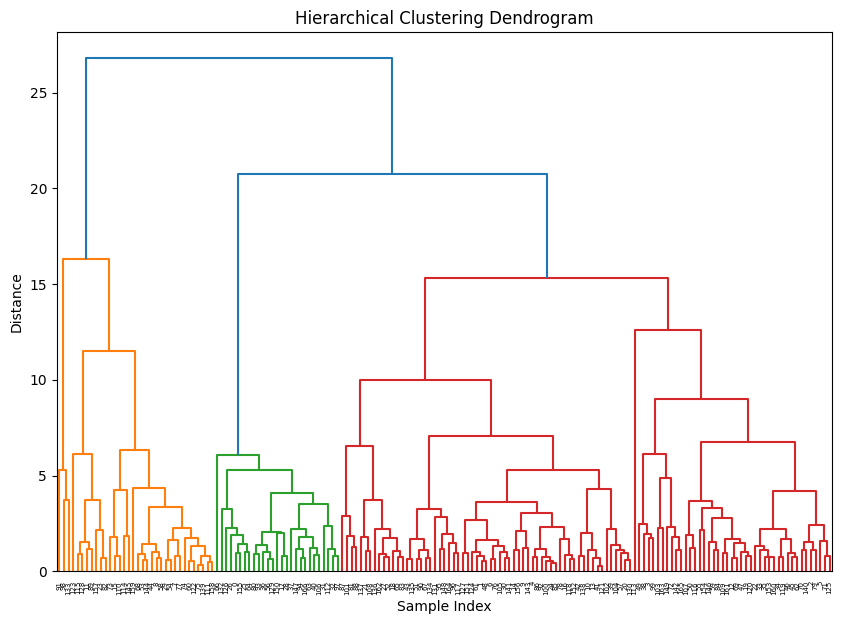

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


X = df_scaled

# Hierarchical Clustering Model - AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  # You can change the linkage method
model.fit(X)

# Evaluate the clustering (using the same evaluation function as before)
labels_agglo = model.labels_
evaluation_results = evaluate_clustering(X, model)
print("Hierarchical Clustering Evaluation:", evaluation_results)

# Dendrogram to visualize the clustering hierarchy
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
import pandas as pd

# Evaluation results from each clustering model
kmeans_eval = {'Silhouette Score': 0.1962, 'Davies-Bouldin Index': 1.1683, 'Calinski-Harabasz Index': 43.0323}
dbscan_eval = {'Silhouette Score': -0.0680, 'Davies-Bouldin Index': 1.6713, 'Calinski-Harabasz Index': 6.6717}
optics_eval = {'Silhouette Score': 0.0372, 'Davies-Bouldin Index': 1.1891, 'Calinski-Harabasz Index': 20.3215}
hierarchical_eval = {'Silhouette Score': 0.2456, 'Davies-Bouldin Index': 1.2998, 'Calinski-Harabasz Index': 50.7162}

# Combining the dictionaries into a DataFrame
evaluation_results = {
    'Model': ['KMeans', 'DBSCAN', 'OPTICS', 'Hierarchical Clustering'],
    'Silhouette Score': [kmeans_eval['Silhouette Score'], dbscan_eval['Silhouette Score'], optics_eval['Silhouette Score'], hierarchical_eval['Silhouette Score']],
    'Davies-Bouldin Index': [kmeans_eval['Davies-Bouldin Index'], dbscan_eval['Davies-Bouldin Index'], optics_eval['Davies-Bouldin Index'], hierarchical_eval['Davies-Bouldin Index']],
    'Calinski-Harabasz Index': [kmeans_eval['Calinski-Harabasz Index'], dbscan_eval['Calinski-Harabasz Index'], optics_eval['Calinski-Harabasz Index'], hierarchical_eval['Calinski-Harabasz Index']]
}

df_evaluation = pd.DataFrame(evaluation_results)

# Display the DataFrame
df_evaluation


,Model,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,KMeans,0.1962,1.1683,43.0323
1,DBSCAN,-0.0680,1.6713,6.6717
2,OPTICS,0.0372,1.1891,20.3215
3,Hierarchical Clustering,0.2456,1.2998,50.7162


**Mean Shift**

**Gaussian Mixture Model (GMM)**

### **Investigate The Clusters**

In [ ]:
df['Cluster_agglo'].value_counts()

,count
Cluster_agglo,
1,106
0,34
2,27


In [ ]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,Cluster_agglo
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1
...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,1
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,1
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,1
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,1
